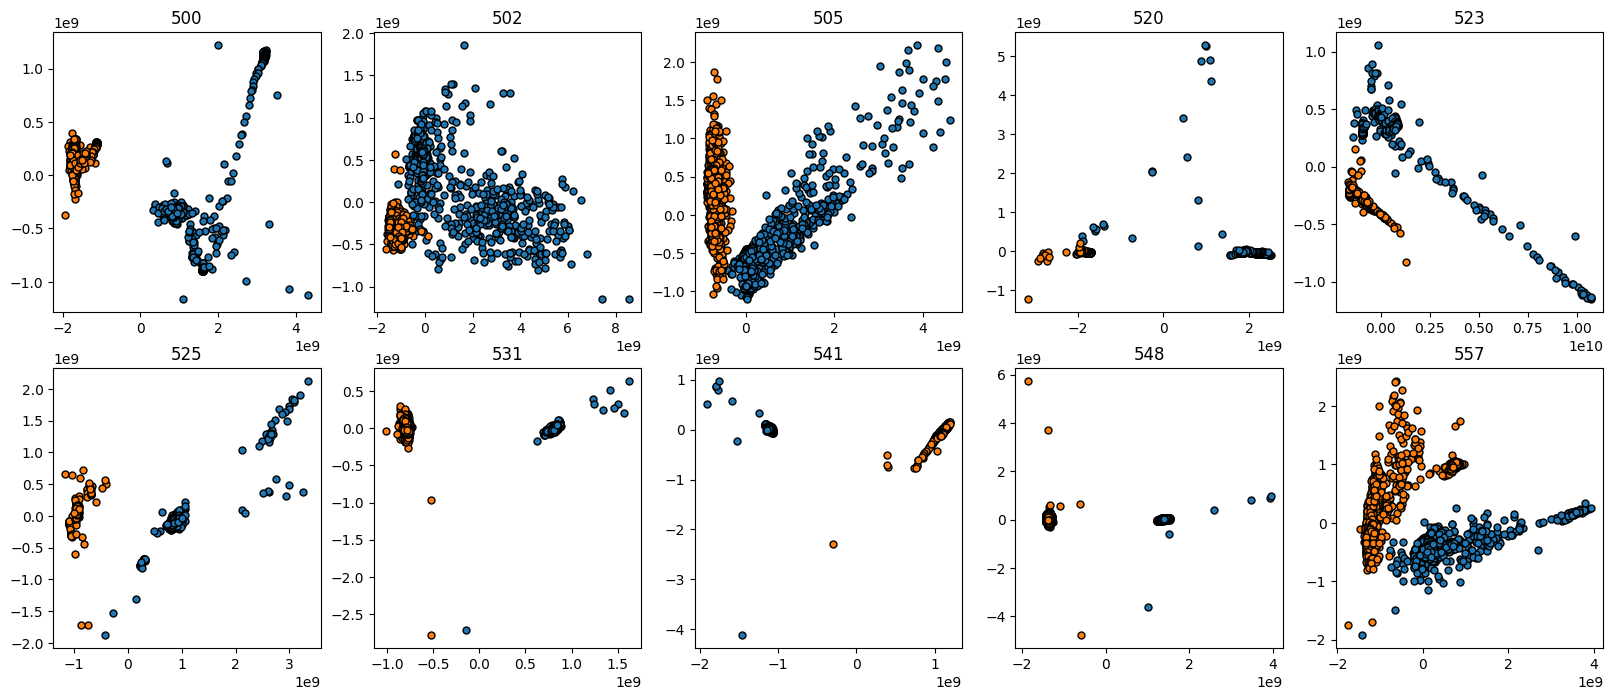

<Figure size 640x480 with 0 Axes>

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import math
import seaborn as sns

fig, ax = plt.subplots(2,5,figsize=(20,8))
ax[0][0].plot()
ax[0][0].set_title('500')
ax[0][1].plot()
ax[0][1].set_title('502')
ax[0][2].plot()
ax[0][2].set_title('505')
ax[0][3].plot()
ax[0][3].set_title('520')
ax[0][4].plot()
ax[0][4].set_title('523')
ax[1][0].plot()
ax[1][0].set_title('525')
ax[1][1].plot()
ax[1][1].set_title('531')
ax[1][2].plot()
ax[1][2].set_title('541')
ax[1][3].plot()
ax[1][3].set_title('548')
ax[1][4].plot()
ax[1][4].set_title('557')

csv_list = ['500.csv','502.csv','505.csv','520.csv','523.csv','525.csv','531.csv','541.csv','548.csv','557.csv']

for csv in range(0,len(csv_list)):
    df1 = pd.read_csv('inst_aligned/' + csv_list[csv])
    df1 = df1.apply(pd.to_numeric,errors='coerce').fillna(0)
    
    # Extract features
    features = ['instruction','cpu-cycle','armv8_pmuv3/stall_backen','armv8_pmuv3/stall_fronten','armv8_pmuv3/br_mis_pre','armv8_pmuv3/br_pre','armv8_pmuv3/br_retire','armv8_pmuv3/inst_spe','armv8_pmuv3/inst_retire','armv8_pmuv3/l1d_cach','armv8_pmuv3/l1d_cache_refil','armv8_pmuv3/l1d_cache_w','armv8_pmuv3/l1d_tl','armv8_pmuv3/l1d_tlb_refil','armv8_pmuv3/l1i_cach','armv8_pmuv3/l1i_cache_refil','armv8_pmuv3/l1i_tl','armv8_pmuv3/l1i_tlb_refil','armv8_pmuv3/l2d_cach','armv8_pmuv3/l2d_cache_allocat','armv8_pmuv3/l2d_cache_refil','armv8_pmuv3/l2d_cache_w','armv8_pmuv3/l2d_tl','armv8_pmuv3/l2d_tlb_refil','armv8_pmuv3/l3d_cach','armv8_pmuv3/l3d_cache_allocat','armv8_pmuv3/l3d_cache_refil','armv8_pmuv3/l3d_cache_w','armv8_pmuv3/mem_acces']
    X = df1[features]
    Y = df1['core']

    pca1 = PCA(n_components=2)
    pca1_features = pca1.fit_transform(X)
  
    pca1_df = pd.DataFrame(
        data=pca1_features,
        columns=['PC1','PC2'])

    target_names = {
        0:'InO',
        1:'OOO'
    }

    pca1_df['target'] = Y
    pca1_df['target'] = pca1_df['target'].map(target_names)
    
    if csv == 0:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[0][0].scatter(group.PC1, group.PC2, edgecolor='k', s=25)
    
    elif csv == 1:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[0][1].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 2:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[0][2].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 3:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[0][3].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 4:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[0][4].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 5:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[1][0].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 6:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[1][1].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 7:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[1][2].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 8:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[1][3].scatter(group.PC1, group.PC2, edgecolor='k', s=25)

    elif csv == 9:
        groups = pca1_df.groupby('target')
        for name, group in groups:
            ax[1][4].scatter(group.PC1, group.PC2, edgecolor='k', s=25)
        
plt.show()
plt.savefig('PCA_intrate.pdf')